# FEATURE ENGINEERING OPERATIONS - {"RED WINE QUALITY" DATASET}

## 1. Importing Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [2]:
# PD Options

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

In [3]:
# SB Options

sb.set_theme(context='notebook', style='whitegrid', palette='pastel', font='times new roman', font_scale=1.25)

## 2. Importing Dataset

### 2.1 Train Dataset

In [4]:
tr = pd.read_pickle('wine_quality_train_pp.pkl')

print(f'Shape of the train dataset : {tr.shape}')
tr.head(5)

Shape of the train dataset : (1159, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1116,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.9929,3.33,0.59,12.8,6
103,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.9988,3.32,0.67,9.7,6
447,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.66,11.8,7
1146,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.9969,3.37,0.46,10.3,5
305,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6


In [5]:
Xtr = tr.drop(columns='quality')
ytr = tr['quality']

### 2.2 Validation Dataset

In [6]:
val = pd.read_pickle('wine_quality_valid_pp.pkl')

print(f'Shape of the validation dataset : {val.shape}')
val.head(5)

Shape of the validation dataset : (100, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
905,10.2,0.29,0.65,2.4,0.075,6.0,17.0,0.9957,3.22,0.63,11.8,6
1336,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.9968,3.39,0.48,10.5,6
69,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5
933,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.9967,3.20,0.52,9.4,5
310,6.7,0.75,0.01,2.4,0.078,17.0,32.0,0.9955,3.55,0.61,12.8,6


### 2.3 Test Dataset

In [7]:
te = pd.read_pickle('wine_quality_test_pp.pkl')

print(f'Shape of the test dataset : {te.shape}')
te.head(5)

Shape of the test dataset : (100, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
37,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
639,9.0,0.46,0.23,2.8,0.092,28.0,104.0,0.9983,3.10,0.56,9.2,5
1137,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.9954,3.36,0.54,10.5,6
1064,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.9951,3.40,0.61,10.9,6
473,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.0008,2.86,0.79,8.4,6


## 3. Feature Engineering Process

### 3.1 Binning / Binarization of Target Feature (y)

#### 3.1.1 Train Dataset

In [8]:
ytr = ytr.apply(lambda x: 1 if x>=6 else 0)
ytr = ytr.astype('category')

  quality  count
0       1    615
1       0    544


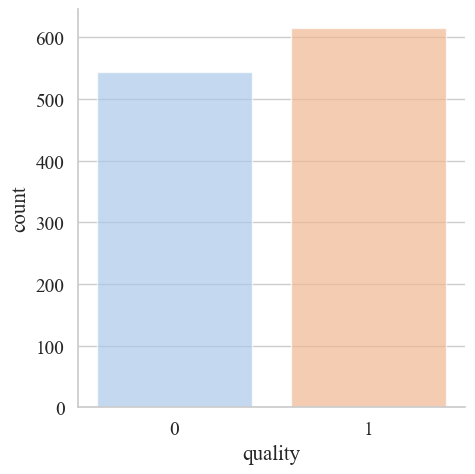

In [9]:
cnt_tr = ytr.value_counts().reset_index()
print(cnt_tr)
sb.catplot(data=cnt_tr, x='quality', y='count', kind='bar', alpha=0.7)

#### 3.1.2 Validation Dataset

In [10]:
val['quality'] = val['quality'].apply(lambda x: 1 if x>=6 else 0)
val['quality'] = val['quality'].astype('category')

  quality  count
0       1     52
1       0     48


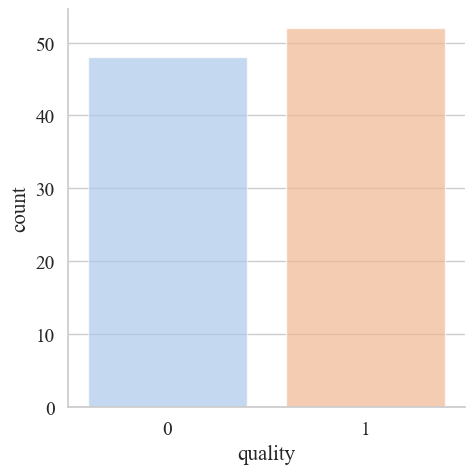

In [11]:
cnt_val = val['quality'].value_counts().reset_index()
print(cnt_val)
sb.catplot(data=cnt_val, x='quality', y='count', kind='bar', alpha=0.7)

In [12]:
val.to_csv('wine_quality_FE_final_valid.csv', index=False)
val.to_pickle('wine_quality_FE_final_valid.pkl')

#### 3.1.3 Test Dataset

In [13]:
te['quality'] = te['quality'].apply(lambda x: 1 if x>=6 else 0)
te['quality'] = te['quality'].astype('category')

  quality  count
0       1     52
1       0     48


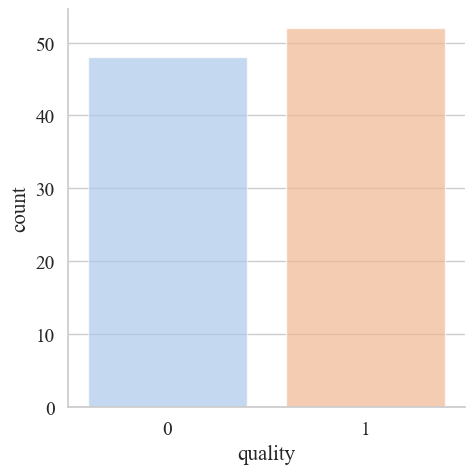

In [14]:
cnt_te = te['quality'].value_counts().reset_index()
print(cnt_te)
sb.catplot(data=cnt_te, x='quality', y='count', kind='bar', alpha=0.7)

In [15]:
te.to_csv('wine_quality_FE_final_test.csv', index=False)
te.to_pickle('wine_quality_FE_final_test.pkl')

### 3.2 Handling Class Imbalance of Target using SMOTE Oversampling Technique

In [16]:
Ximb = Xtr
Yimb = ytr

Ximb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1116,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.9929,3.33,0.59,12.8
103,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.9988,3.32,0.67,9.7
447,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.66,11.8
1146,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.9969,3.37,0.46,10.3
305,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.0004,3.28,0.98,9.9


In [17]:
Yimb.head()

1116    1
103     1
447     1
1146    0
305     1
Name: quality, dtype: category
Categories (2, int64): [0, 1]

In [18]:
sm = SMOTE(random_state=46)

Xtr, ytr = sm.fit_resample(Ximb,Yimb)

In [19]:
Xtr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.9929,3.33,0.59,12.8
1,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.9988,3.32,0.67,9.7
2,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.66,11.8
3,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.9969,3.37,0.46,10.3
4,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.0004,3.28,0.98,9.9


In [20]:
ytr.head()

0    1
1    1
2    1
3    0
4    1
Name: quality, dtype: category
Categories (2, int64): [0, 1]

Class Distribution after Balancing : 

  quality  count
0       0    615
1       1    615


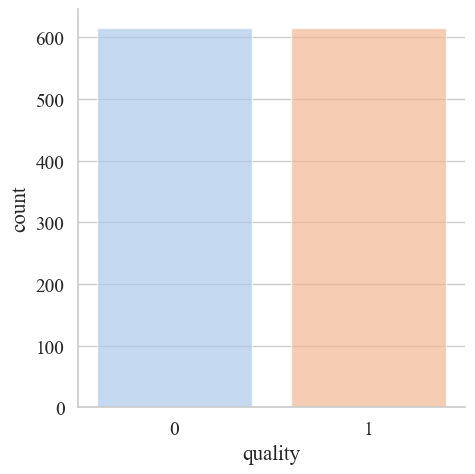

In [21]:
print(f'Class Distribution after Balancing : \n')

ytr.value_counts()
cnt_tr = ytr.value_counts().reset_index()
print(cnt_tr)
sb.catplot(data=cnt_tr, x='quality', y='count', kind='bar', alpha=0.7)

### 3.3 Outliers Detection (IQR) and Handling (Capping)
##### - Outlier detection and handling is applied only on training data.
##### - Operation is not applied on the validation and test data, to avoid the changes in the data. Considering that the prediction is applied on individual basis, one at a time. So, no point of finding IQR and applying capping. 

In [22]:
def outliers_detect_handle(df):
     
    fea_flo = df.select_dtypes(include='float').columns.values.tolist()
    fea_int = df.select_dtypes(include='int').columns.values.tolist()

    fea_num = fea_flo + fea_int
    fea_num
    
    # OUTLIER DETECTION CODE ----------------------------------------------------------------------------------------------
    
    for fea in fea_num:
      
        print(f'Outlier Detection for Feature : {fea} \n')

        mn = df[fea].min()
        mx = df[fea].max()
        print(f'Minimum Value : {mn} and Maximum Value : {mx} \n')

        q1,q3 = df[fea].quantile([0.25,0.75])         #  for 1st and 3rd quartile
        print(f'1st Quartile : {q1} and 3rd Quartile : {q3} \n')

        lb = round(q1 - (q3-q1)*1.5,4)
        ub = round(q3 + (q3-q1)*1.5,4)
        print(f'Lower Bound : {lb} and Higher Bound : {ub} \n')

        filtl = df[fea] < lb
        out_low = df[filtl]
        print(f'No. of Outliers below Lower Bound ({lb}) are : {out_low.shape[0]}')

        filtu = df[fea] > ub
        out_high = df[filtu]
        print(f'No. of Outliers above Upper Bound ({ub}) are : {out_high.shape[0]}')

        out_df = df[(filtl | filtu)]
        print(f'Total No. of Outliers are : {out_df.shape[0]} \n')

        per = (out_df.shape[0]/df[fea].shape[0])*100
        print(f'Percentage of Outliers Records are : {round(per,4)} % \n\n')

        plt.figure(figsize=(15,5))
        plt.subplot(2,2,1)
        plt.title('KDE Plot Before')
        sb.kdeplot(data=df, x=fea)

        plt.subplot(2,2,2)
        plt.title('BOX Plot Before')
        sb.boxplot(data=df, x=fea)

        # OUTLIER HANDLING USING CAPPING TECHNIQUE -----------------------------------------------------------------------------
        df.loc[filtl,fea] = lb                        
        df.loc[filtu,fea] = ub

        # OUTLIER DETECTION CODE -----------------------------------------------------------------------------------------------
        filtl = df[fea] < lb
        out_low = df[filtl]
        print(f'No. of Outliers below Lower Bound ({lb}) are : {out_low.shape[0]}')

        filtu = df[fea] > ub
        out_high = df[filtu]
        print(f'No. of Outliers above Upper Bound ({ub}) are : {out_high.shape[0]}')

        out_df = df[(filtl | filtu)]
        print(f'Total No. of Outliers are : {out_df.shape[0]} \n')

        per = (out_df.shape[0]/df[fea].shape[0])*100
        print(f'Percentage of Outliers Records are : {round(per,4)} %')

        plt.subplot(2,2,3)
        plt.title('KDE Plot After')
        sb.kdeplot(data=df, x=fea)

        plt.subplot(2,2,4)
        plt.title('BOX Plot After')
        sb.boxplot(data=df, x=fea)

        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.8)
        plt.show()

        print('\n\n\n\n')
    
    return df

In [23]:
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [24]:
fea_flo = Xtr.select_dtypes(include='float').columns.values.tolist()
fea_int = Xtr.select_dtypes(include='int').columns.values.tolist()

fea_num = fea_flo + fea_int
fea_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [25]:
Xtr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000
mean,8.3159,0.5336,0.2725,2.4941,0.0885,15.8193,47.5212,0.9967,3.3079,0.6567,10.3963
std,1.7001,0.1796,0.1938,1.2675,0.0501,10.5133,34.2453,0.0018,0.1551,0.1731,1.0734
min,4.6000,0.1600,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000
25%,7.1630,0.3900,0.1000,1.9000,0.0700,7.0000,22.0000,0.9957,3.2000,0.5500,9.5000
50%,7.9000,0.5300,0.2600,2.2000,0.0790,13.0000,38.0000,0.9967,3.3092,0.6200,10.1000
75%,9.2000,0.6450,0.4275,2.6000,0.0910,21.0000,64.0000,0.9978,3.4000,0.7200,11.1000
max,15.9000,1.3300,1.0000,15.4000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000


In [26]:
# Outlier Detect and Handle Code
Xtr_out = Xtr.copy() 
Xtr_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000
mean,8.3159,0.5336,0.2725,2.4941,0.0885,15.8193,47.5212,0.9967,3.3079,0.6567,10.3963
std,1.7001,0.1796,0.1938,1.2675,0.0501,10.5133,34.2453,0.0018,0.1551,0.1731,1.0734
min,4.6000,0.1600,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000
25%,7.1630,0.3900,0.1000,1.9000,0.0700,7.0000,22.0000,0.9957,3.2000,0.5500,9.5000
50%,7.9000,0.5300,0.2600,2.2000,0.0790,13.0000,38.0000,0.9967,3.3092,0.6200,10.1000
75%,9.2000,0.6450,0.4275,2.6000,0.0910,21.0000,64.0000,0.9978,3.4000,0.7200,11.1000
max,15.9000,1.3300,1.0000,15.4000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000


Outlier Detection for Feature : fixed acidity 

Minimum Value : 4.6 and Maximum Value : 15.9 

1st Quartile : 7.162978568641904 and 3rd Quartile : 9.2 

Lower Bound : 4.1074 and Higher Bound : 12.2555 

No. of Outliers below Lower Bound (4.1074) are : 0
No. of Outliers above Upper Bound (12.2555) are : 37
Total No. of Outliers are : 37 

Percentage of Outliers Records are : 3.0081 % 


No. of Outliers below Lower Bound (4.1074) are : 0
No. of Outliers above Upper Bound (12.2555) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


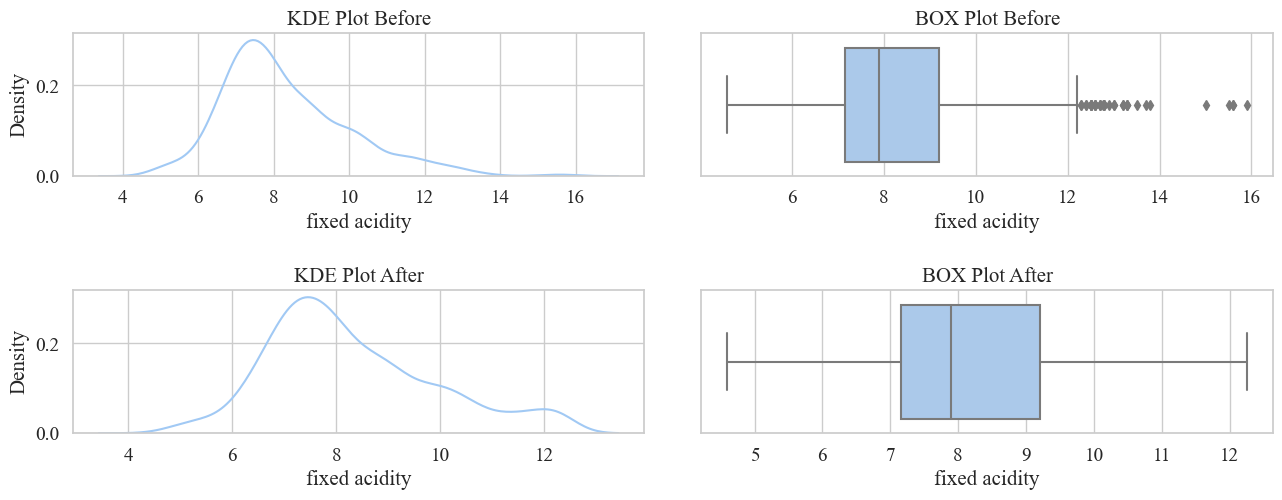






Outlier Detection for Feature : volatile acidity 

Minimum Value : 0.16 and Maximum Value : 1.33 

1st Quartile : 0.39 and 3rd Quartile : 0.645 

Lower Bound : 0.0075 and Higher Bound : 1.0275 

No. of Outliers below Lower Bound (0.0075) are : 0
No. of Outliers above Upper Bound (1.0275) are : 10
Total No. of Outliers are : 10 

Percentage of Outliers Records are : 0.813 % 


No. of Outliers below Lower Bound (0.0075) are : 0
No. of Outliers above Upper Bound (1.0275) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


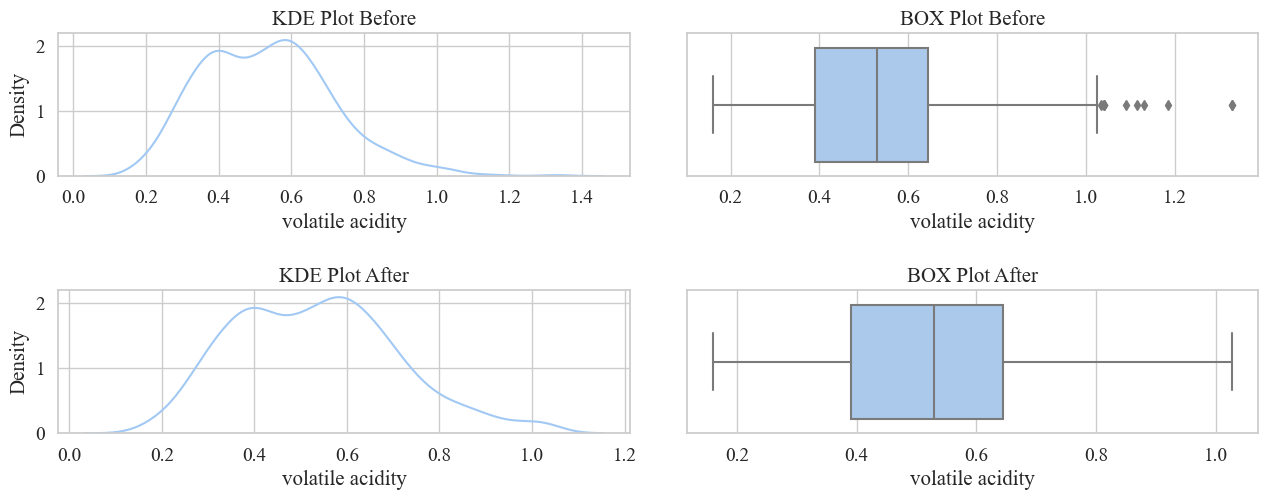






Outlier Detection for Feature : citric acid 

Minimum Value : 0.0 and Maximum Value : 1.0 

1st Quartile : 0.1 and 3rd Quartile : 0.4275 

Lower Bound : -0.3912 and Higher Bound : 0.9187 

No. of Outliers below Lower Bound (-0.3912) are : 0
No. of Outliers above Upper Bound (0.9187) are : 1
Total No. of Outliers are : 1 

Percentage of Outliers Records are : 0.0813 % 


No. of Outliers below Lower Bound (-0.3912) are : 0
No. of Outliers above Upper Bound (0.9187) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


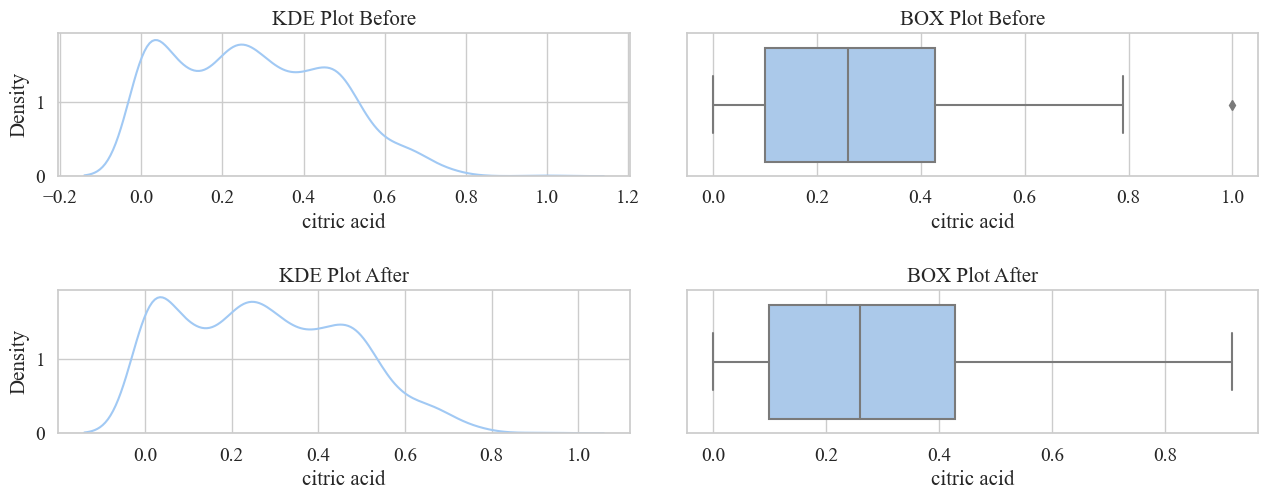






Outlier Detection for Feature : residual sugar 

Minimum Value : 0.9 and Maximum Value : 15.4 

1st Quartile : 1.9 and 3rd Quartile : 2.6 

Lower Bound : 0.85 and Higher Bound : 3.65 

No. of Outliers below Lower Bound (0.85) are : 0
No. of Outliers above Upper Bound (3.65) are : 110
Total No. of Outliers are : 110 

Percentage of Outliers Records are : 8.9431 % 


No. of Outliers below Lower Bound (0.85) are : 0
No. of Outliers above Upper Bound (3.65) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


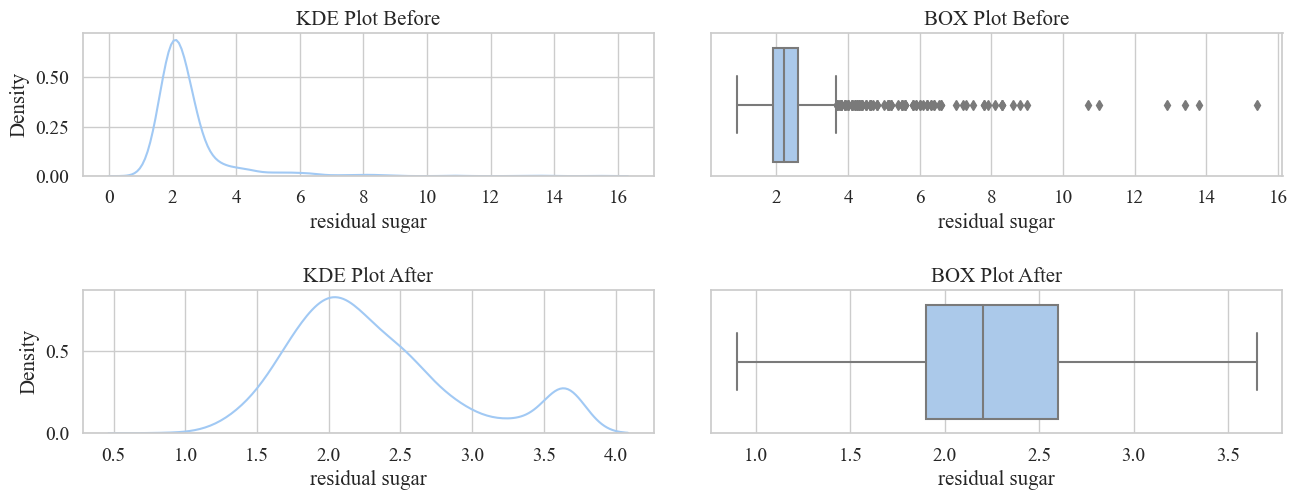






Outlier Detection for Feature : chlorides 

Minimum Value : 0.012 and Maximum Value : 0.611 

1st Quartile : 0.07 and 3rd Quartile : 0.091 

Lower Bound : 0.0385 and Higher Bound : 0.1225 

No. of Outliers below Lower Bound (0.0385) are : 3
No. of Outliers above Upper Bound (0.1225) are : 74
Total No. of Outliers are : 77 

Percentage of Outliers Records are : 6.2602 % 


No. of Outliers below Lower Bound (0.0385) are : 0
No. of Outliers above Upper Bound (0.1225) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


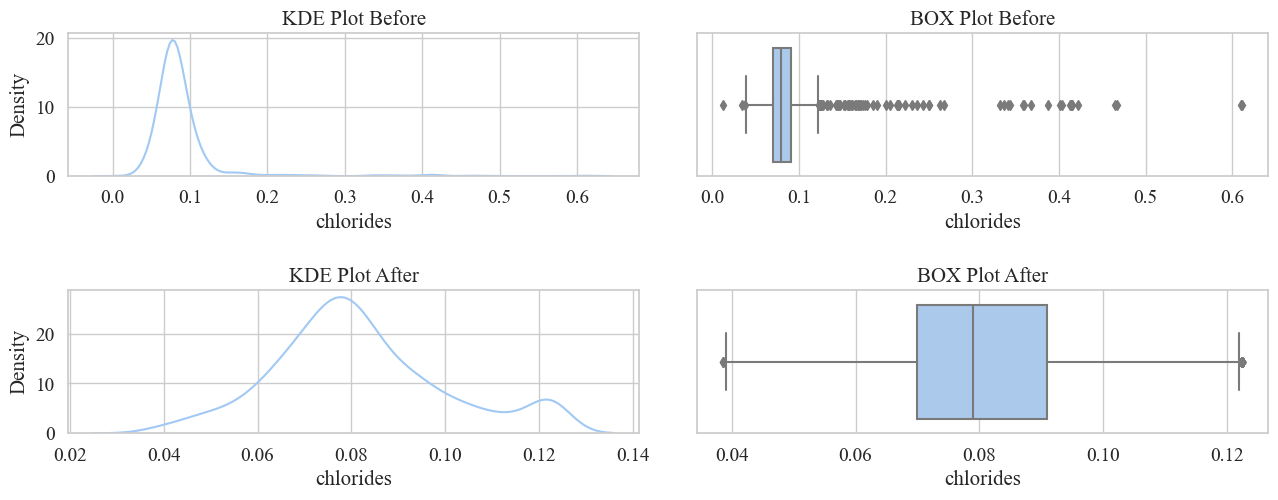






Outlier Detection for Feature : free sulfur dioxide 

Minimum Value : 1.0 and Maximum Value : 72.0 

1st Quartile : 7.0 and 3rd Quartile : 21.0 

Lower Bound : -14.0 and Higher Bound : 42.0 

No. of Outliers below Lower Bound (-14.0) are : 0
No. of Outliers above Upper Bound (42.0) are : 26
Total No. of Outliers are : 26 

Percentage of Outliers Records are : 2.1138 % 


No. of Outliers below Lower Bound (-14.0) are : 0
No. of Outliers above Upper Bound (42.0) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


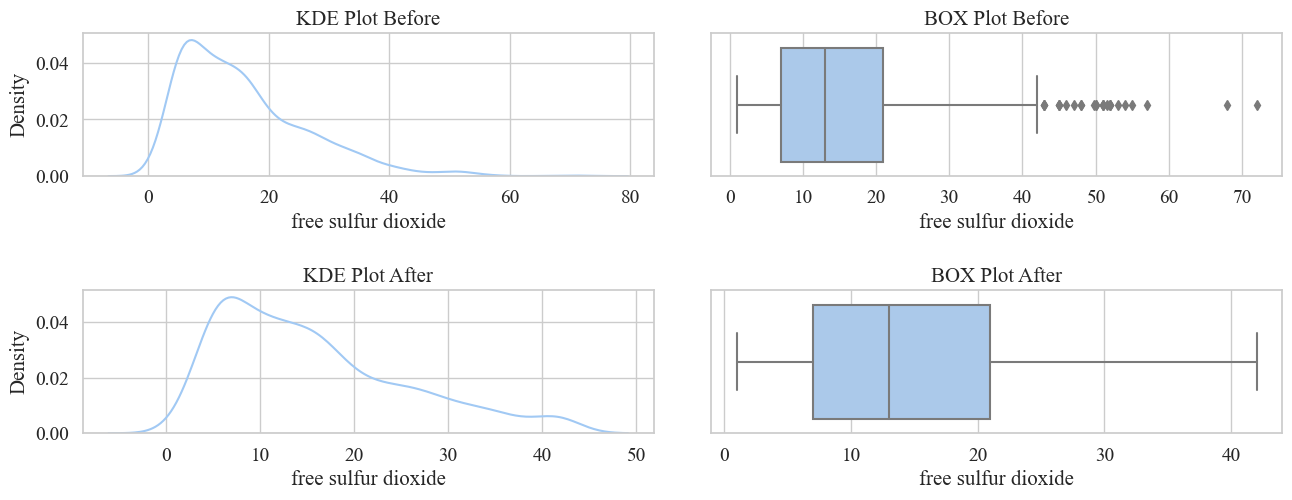






Outlier Detection for Feature : total sulfur dioxide 

Minimum Value : 6.0 and Maximum Value : 289.0 

1st Quartile : 22.0 and 3rd Quartile : 64.0 

Lower Bound : -41.0 and Higher Bound : 127.0 

No. of Outliers below Lower Bound (-41.0) are : 0
No. of Outliers above Upper Bound (127.0) are : 42
Total No. of Outliers are : 42 

Percentage of Outliers Records are : 3.4146 % 


No. of Outliers below Lower Bound (-41.0) are : 0
No. of Outliers above Upper Bound (127.0) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


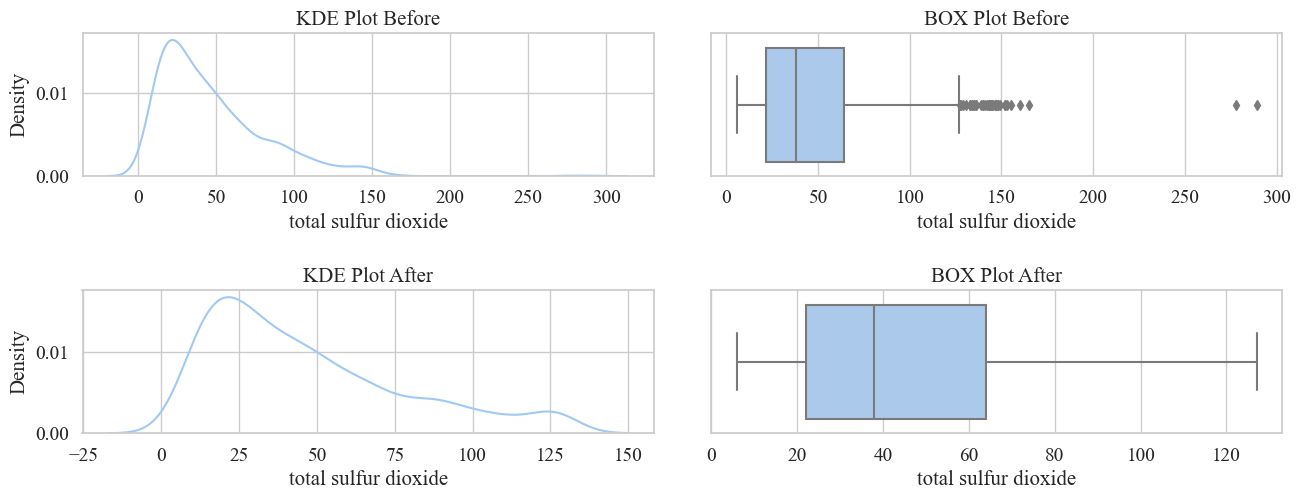






Outlier Detection for Feature : density 

Minimum Value : 0.99007 and Maximum Value : 1.00369 

1st Quartile : 0.995665 and 3rd Quartile : 0.9978 

Lower Bound : 0.9925 and Higher Bound : 1.001 

No. of Outliers below Lower Bound (0.9925) are : 22
No. of Outliers above Upper Bound (1.001) are : 15
Total No. of Outliers are : 37 

Percentage of Outliers Records are : 3.0081 % 


No. of Outliers below Lower Bound (0.9925) are : 0
No. of Outliers above Upper Bound (1.001) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


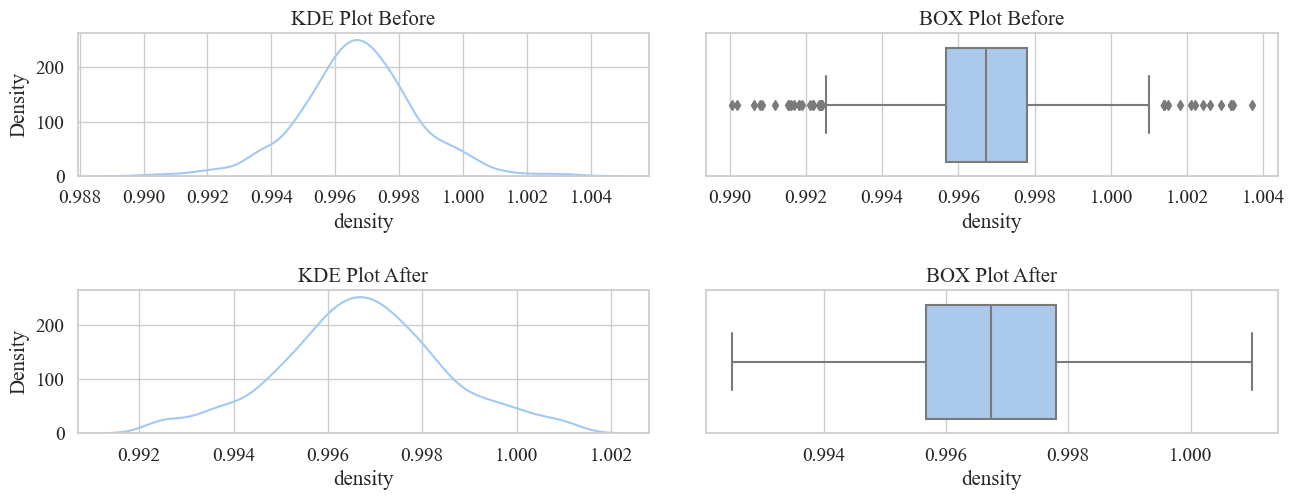






Outlier Detection for Feature : pH 

Minimum Value : 2.74 and Maximum Value : 4.01 

1st Quartile : 3.2 and 3rd Quartile : 3.4 

Lower Bound : 2.9 and Higher Bound : 3.7 

No. of Outliers below Lower Bound (2.9) are : 6
No. of Outliers above Upper Bound (3.7) are : 13
Total No. of Outliers are : 19 

Percentage of Outliers Records are : 1.5447 % 


No. of Outliers below Lower Bound (2.9) are : 0
No. of Outliers above Upper Bound (3.7) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


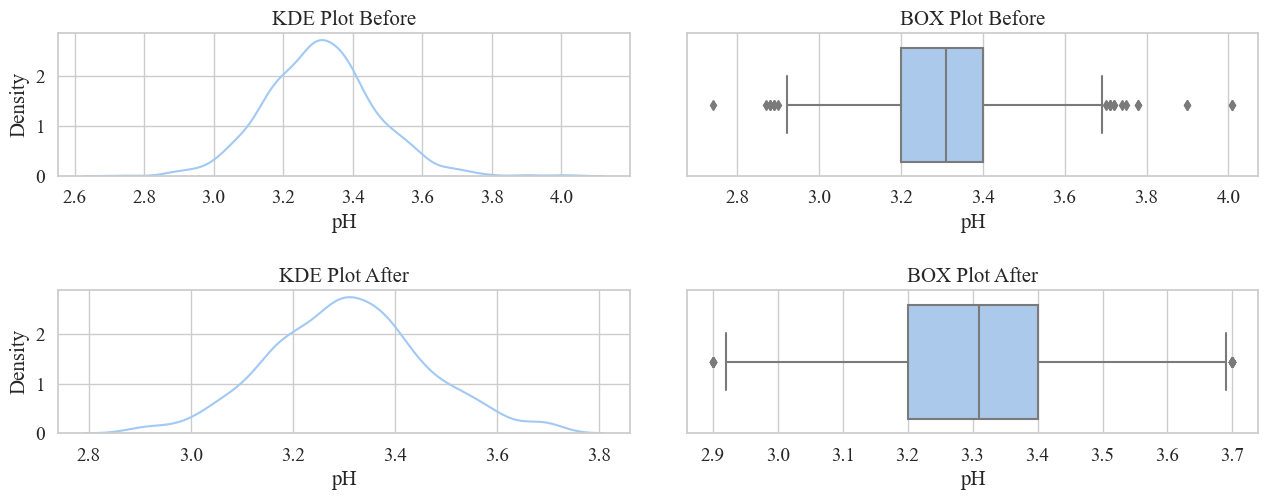






Outlier Detection for Feature : sulphates 

Minimum Value : 0.33 and Maximum Value : 2.0 

1st Quartile : 0.55 and 3rd Quartile : 0.72 

Lower Bound : 0.295 and Higher Bound : 0.975 

No. of Outliers below Lower Bound (0.295) are : 0
No. of Outliers above Upper Bound (0.975) are : 57
Total No. of Outliers are : 57 

Percentage of Outliers Records are : 4.6341 % 


No. of Outliers below Lower Bound (0.295) are : 0
No. of Outliers above Upper Bound (0.975) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


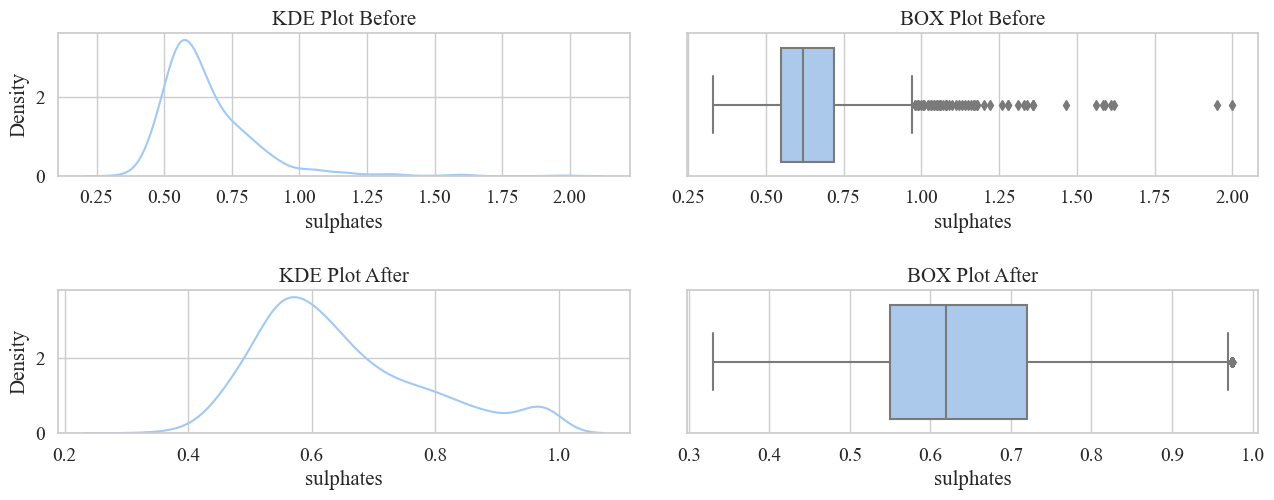






Outlier Detection for Feature : alcohol 

Minimum Value : 8.4 and Maximum Value : 14.9 

1st Quartile : 9.5 and 3rd Quartile : 11.1 

Lower Bound : 7.1 and Higher Bound : 13.5 

No. of Outliers below Lower Bound (7.1) are : 0
No. of Outliers above Upper Bound (13.5) are : 12
Total No. of Outliers are : 12 

Percentage of Outliers Records are : 0.9756 % 


No. of Outliers below Lower Bound (7.1) are : 0
No. of Outliers above Upper Bound (13.5) are : 0
Total No. of Outliers are : 0 

Percentage of Outliers Records are : 0.0 %


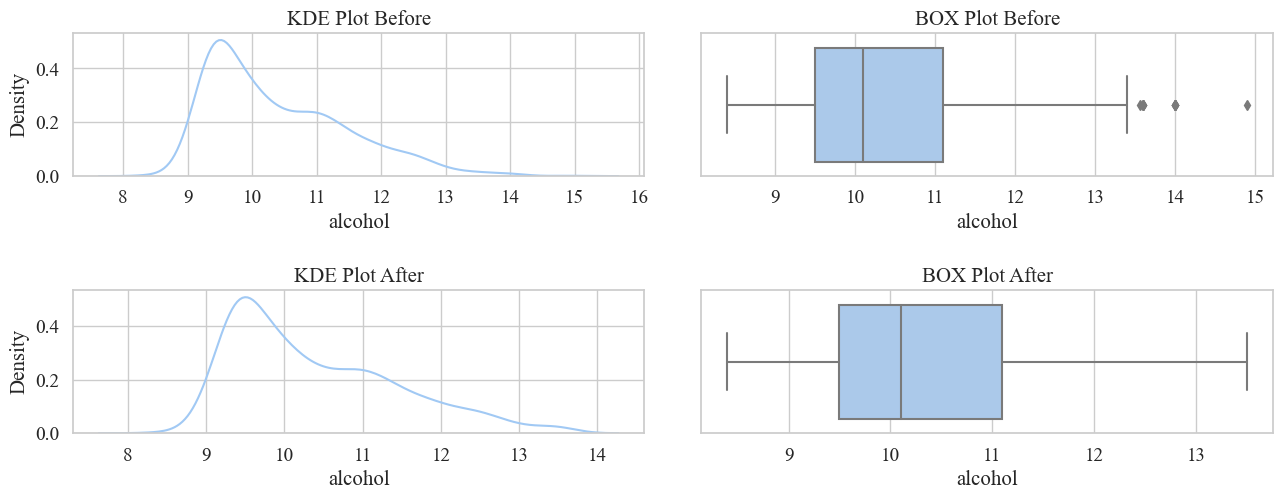

In [27]:
Xtr_out = outliers_detect_handle(Xtr_out)

In [28]:
Xtr_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000,1230.0000
mean,8.2879,0.5328,0.2725,2.3157,0.0816,15.6320,46.7600,0.9967,3.3070,0.6463,10.3923
std,1.6164,0.1767,0.1936,0.6028,0.0185,9.9034,31.6386,0.0017,0.1509,0.1359,1.0606
min,4.6000,0.1600,0.0000,0.9000,0.0385,1.0000,6.0000,0.9925,2.9000,0.3300,8.4000
25%,7.1630,0.3900,0.1000,1.9000,0.0700,7.0000,22.0000,0.9957,3.2000,0.5500,9.5000
50%,7.9000,0.5300,0.2600,2.2000,0.0790,13.0000,38.0000,0.9967,3.3092,0.6200,10.1000
75%,9.2000,0.6450,0.4275,2.6000,0.0910,21.0000,64.0000,0.9978,3.4000,0.7200,11.1000
max,12.2555,1.0275,0.9187,3.6500,0.1225,42.0000,127.0000,1.0010,3.7000,0.9750,13.5000


In [29]:
### Train dataframe after outlier detection and handling operation, using Xtr_out and ytrain (after balancing)

dftr = pd.concat([Xtr_out,ytr], axis=1)
dftr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.9929,3.33,0.590,12.8,1
1,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.9988,3.32,0.670,9.7,1
2,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.660,11.8,1
3,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.9969,3.37,0.460,10.3,0
4,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.0004,3.28,0.975,9.9,1


##### Saving Final Train CSV File and Pickle Files, after outlier detection and handling step.

In [30]:
print('Writing the dataframes after outlier detection and handling to CSV and PKL files ... \n')

dftr.to_csv('wine_quality_FE_final_train.csv', index=False)
dftr.to_pickle('wine_quality_FE_final_train.pkl')

print('Train File Saved Successfully ...')

Writing the dataframes after outlier detection and handling to CSV and PKL files ... 

Train File Saved Successfully ...


### 3.4 Feature Transformation (to be applied in the model pipeline)

#### 3.4.1 Checking transformations on numerical features

In [31]:
from scipy import stats as sts

In [32]:
def trans_skew_kurt(df, fea):
    print(f'Skew: {round(df[fea].skew(),4)} and Kurt {round(df[fea].kurt(),4)}, Before Transformation for "{fea}" \n')
    print(f'Skew and Kurt After Transformation for "{fea}"')
   
    ops = []
    skw_aft = []
    krt_aft = []
    
    dft = df.copy()
    dft[fea] = np.log(dft[fea]+1)                # Log
    ops.append('Log')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    dft = df.copy()
    dft[fea] = dft[fea]**2                       # Square
    ops.append('Square')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    
    dft = df.copy()
    dft[fea] = 1/(dft[fea]+1)                    # Reciprocal
    ops.append('Reciprocal')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    
    dft = df.copy()
    dft[fea] = dft[fea]**(1/2)                   # Square Root
    ops.append('SQRT')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
   
    dft = df.copy()
    dft[fea] = dft[fea]**(1/1.2)                 # Exponential
    ops.append('Exponential')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    # print(f'Transformation : Box-Cox')           # Box-Cox
    # dft = df.copy()
    # dft[fea], l = sts.boxcox(dft[fea])
    # print(f'Lambda : {round(l,4)}')
    # shape_check_comp(df, dft, fea)

    
    dft = df.copy()
    dft[fea], l = sts.yeojohnson(dft[fea])
    ops.append('Yeo-Johnson')
    skw_aft.append(round(dft[fea].skew(),4))
    krt_aft.append(round(dft[fea].kurt(),4))
    
    sk_kr = pd.DataFrame({'Operation':ops,'Skew':skw_aft,'Kurtosis':krt_aft})
    print(sk_kr.sort_values(by=['Skew'], ascending=True))

In [33]:
def shape_check_comp(df, dft, fea):

    plt.figure(figsize=(20,8))
    plt.subplot(2,2,1)
    plt.title('KDE Plot "Before"')
    sb.kdeplot(data=df, x=fea)
    
    plt.subplot(2,2,2)
    plt.title('KDE Plot "After"')
    sb.kdeplot(data=dft, x=fea)
    
    plt.subplot(2,2,3)
    plt.title('QQ-Plot "Before"')
    sts.probplot(df[fea], dist='norm', plot=plt)   # fit=True                   ## QQ-PLOT to check 'normality'
    
    plt.subplot(2,2,4)
    plt.title('QQ-Plot "After"')
    sts.probplot(dft[fea], dist='norm', plot=plt)   # fit=True                   ## QQ-PLOT to check 'normality'

    
    # plt.title('Box Plot')
    # sb.boxplot(data=df, x=fea)

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.8)
    
    plt.show()

    print('\n')

In [34]:
def shape_check_all_trans(df, fea):
    
    print(f'Feature Name : {fea} \n')

    print(f'Transformation : Log')
    dft = df.copy()
    dft[fea] = np.log(dft[fea]+1)                # Log
    shape_check_comp(df, dft, fea)       
    
    print(f'Transformation : Square')
    dft = df.copy()
    dft[fea] = dft[fea]**2                       # Square
    shape_check_comp(df, dft, fea)
    
    print(f'Transformation : Reciprocal')
    dft = df.copy()
    dft[fea] = 1/(dft[fea]+1)                    # Reciprocal
    shape_check_comp(df, dft, fea)
    
    print(f'Transformation : Square Root')
    dft = df.copy()
    dft[fea] = dft[fea]**(1/2)                   # Square Root
    shape_check_comp(df, dft, fea)
    
    print(f'Transformation : Exponential')
    dft = df.copy()
    dft[fea] = dft[fea]**(1/1.2)                 # Exponential
    shape_check_comp(df, dft, fea)
    
    # print(f'Transformation : Box-Cox')           # Box-Cox
    # dft = df.copy()
    # dft[fea], l = sts.boxcox(dft[fea])
    # print(f'Lambda : {round(l,4)}')
    # shape_check_comp(df, dft, fea)

    print(f'Transformation : Yeo-Johnson')      # Yeo-Johnson
    dft = df.copy()
    dft[fea], l = sts.yeojohnson(dft[fea])
    print(f'Lambda : {round(l,4)}')
    shape_check_comp(df, dft, fea)

In [35]:
fea_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [36]:
trans_skew_kurt(Xtr_out,'alcohol')

Skew: 0.8476 and Kurt -0.0501, Before Transformation for "alcohol" 

Skew and Kurt After Transformation for "alcohol"
     Operation    Skew  Kurtosis
2   Reciprocal -0.5427   -0.6582
5  Yeo-Johnson  0.1361   -1.0162
0          Log  0.6900   -0.3979
3         SQRT  0.7602   -0.2511
4  Exponential  0.8181   -0.1203
1       Square  1.0327    0.4438


Feature Name : alcohol 

Transformation : Log


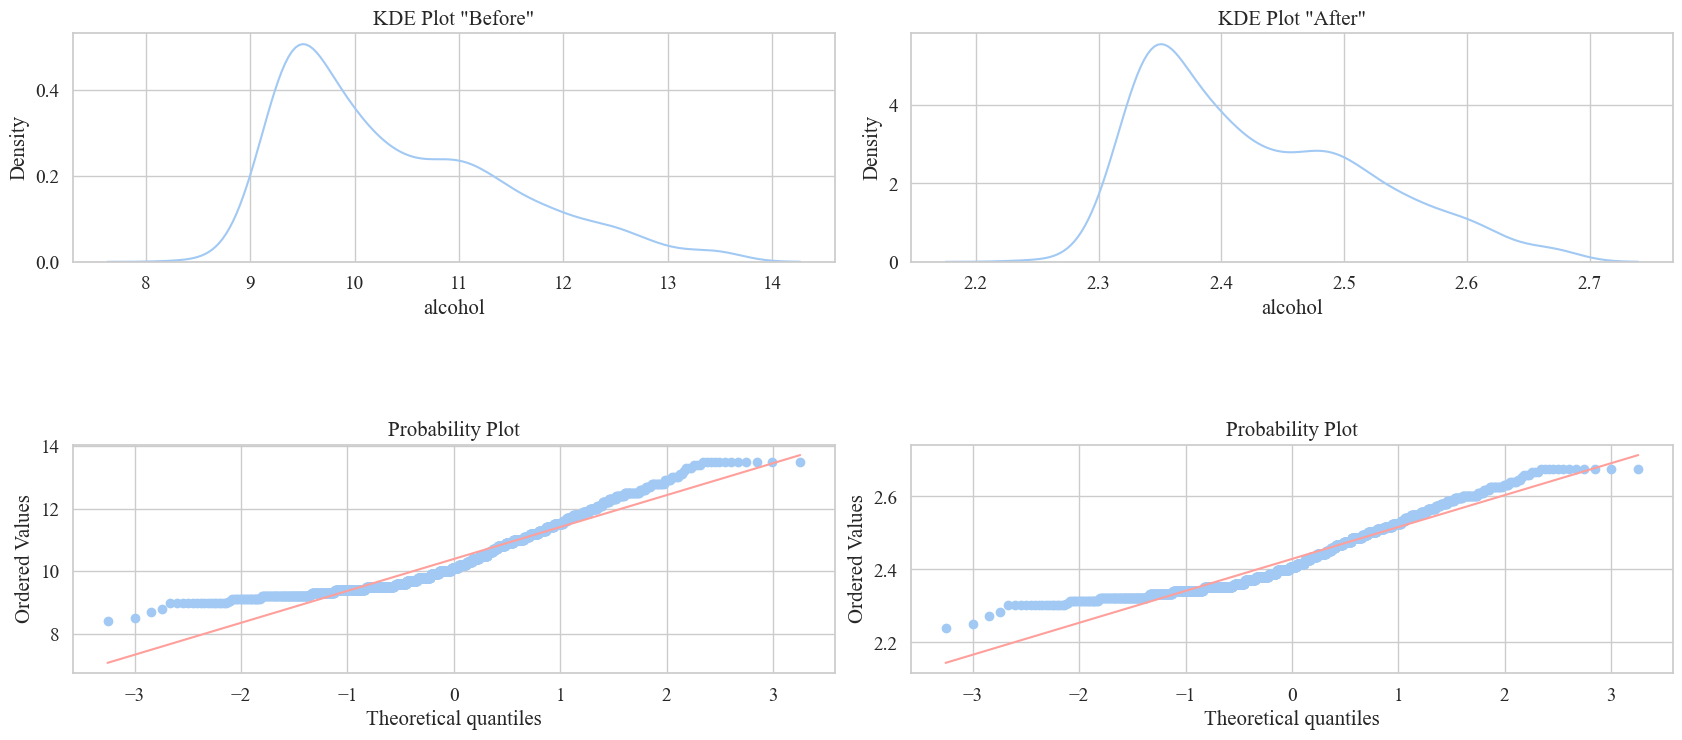



Transformation : Square


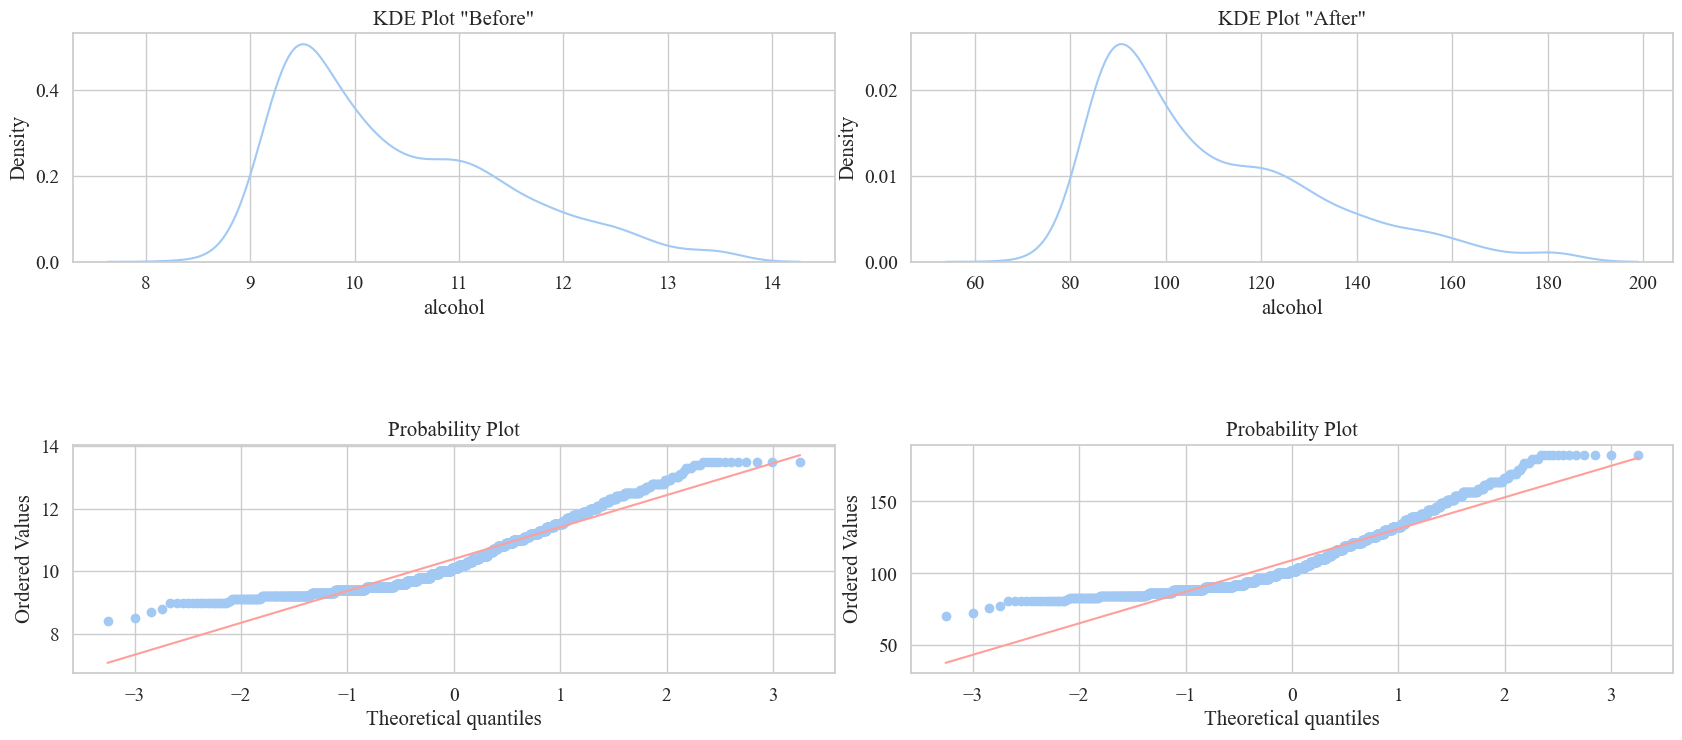



Transformation : Reciprocal


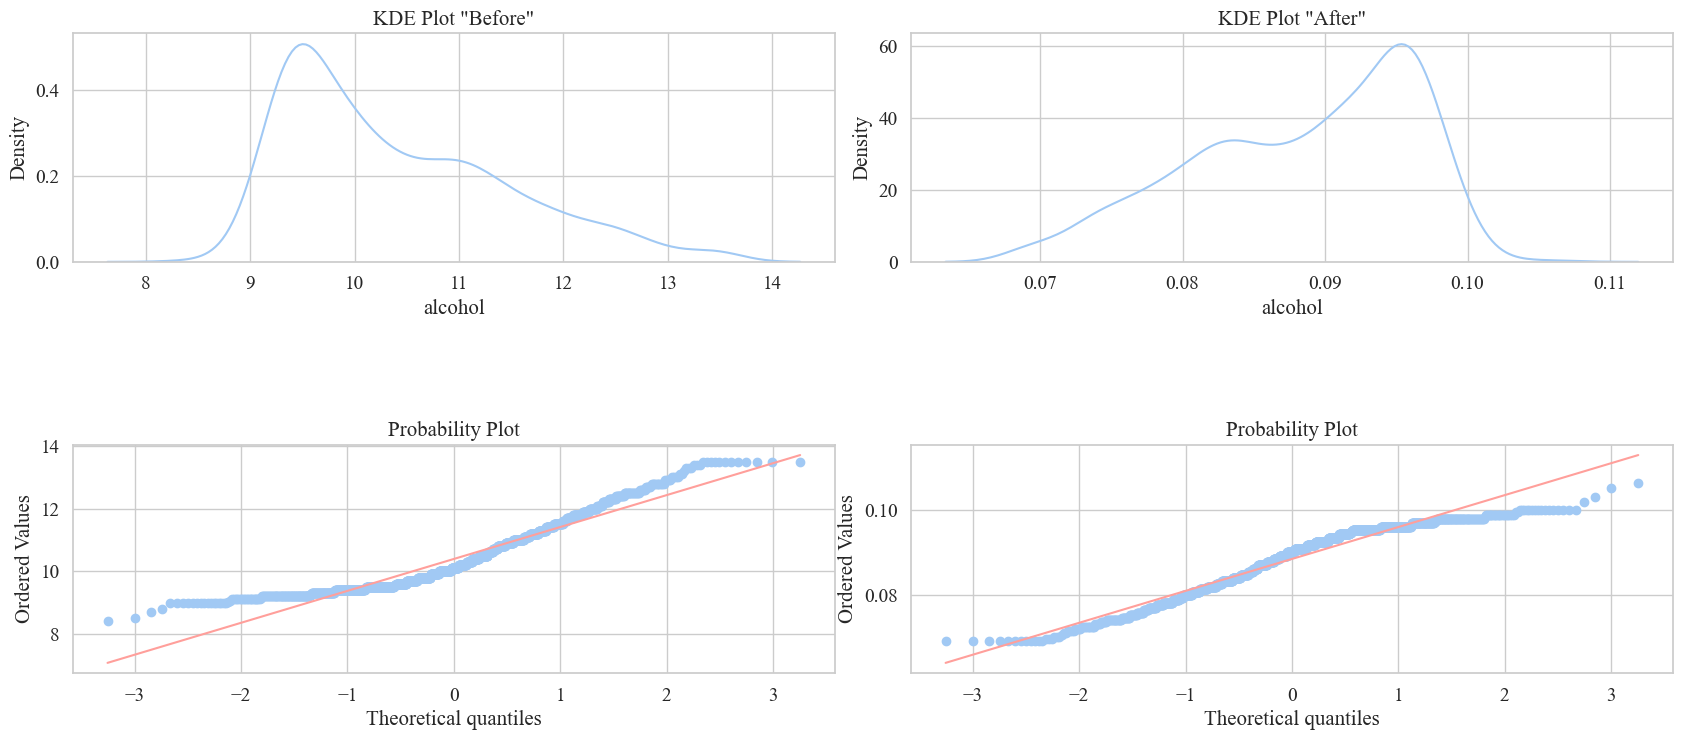



Transformation : Square Root


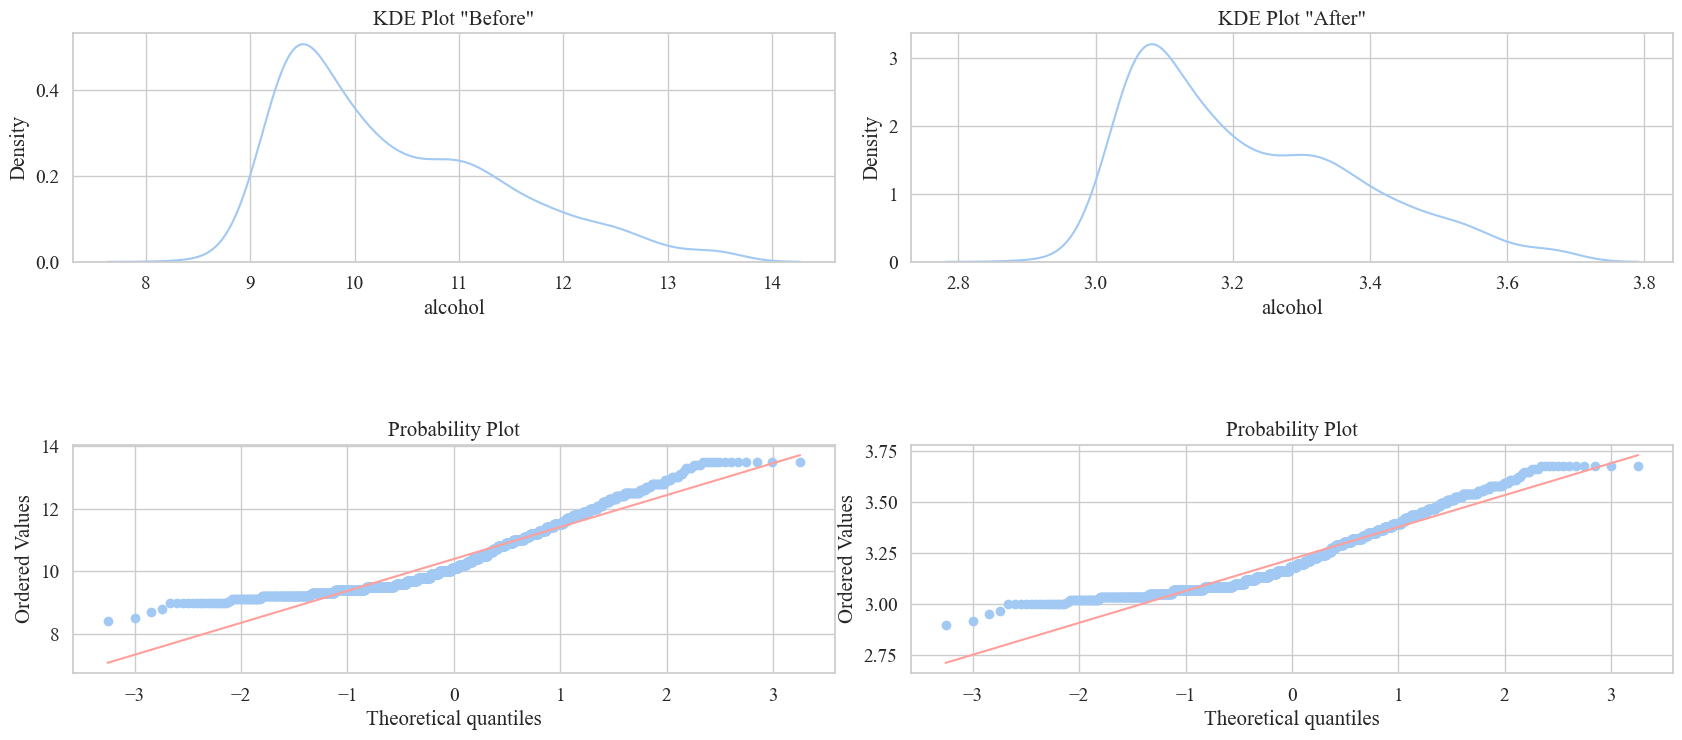



Transformation : Exponential


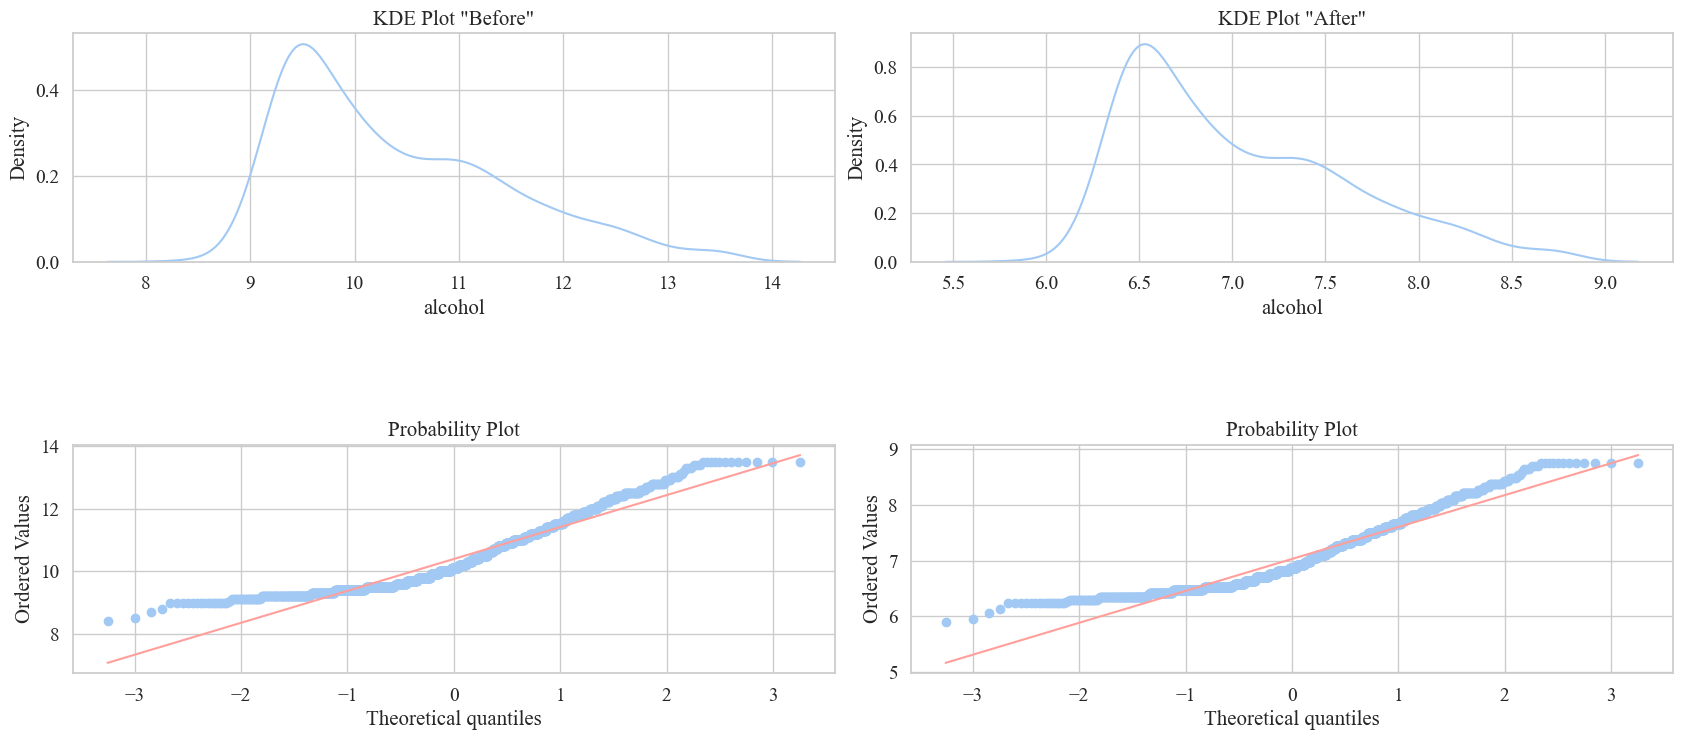



Transformation : Yeo-Johnson
Lambda : -4.0908


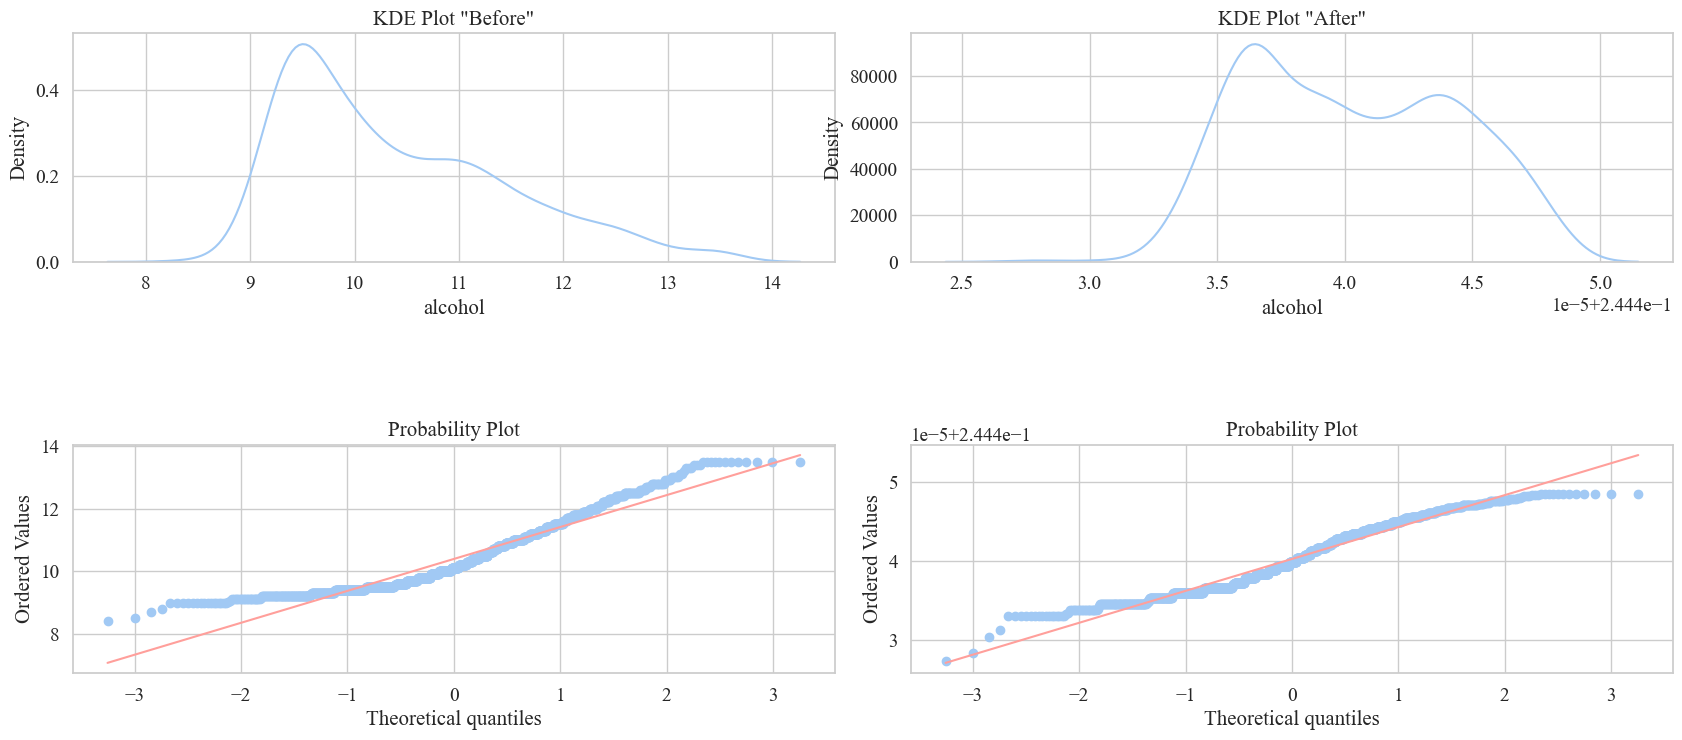

In [37]:
shape_check_all_trans(Xtr_out,'alcohol')

#### 3.4.2 Applying transfromations on numerical features

In [38]:
pt_yj = PowerTransformer(method='yeo-johnson', standardize=False)

Xtr_pt_yj = pt_yj.fit_transform(Xtr_out)   ## np.array as output

print(Xtr_pt_yj.shape)
print(Xtr_pt_yj[0:5])

(1230, 11)
[[1.202047   0.37289241 0.1373342  0.73320252 0.04822369 2.91759156
  3.80001783 0.185601   1.66643846 0.2350592  0.24444756]
 [1.31446105 0.25280295 0.34842279 0.68298535 0.05650167 3.67289827
  4.48346942 0.18567992 1.6634654  0.24459752 0.24443783]
 [1.32343747 0.37289241 0.46516033 0.69145321 0.06808969 2.14464556
  3.0916521  0.18565999 1.59345921 0.24351316 0.24444564]
 [1.24415256 0.4413035  0.02944921 0.64313778 0.05931698 3.10306895
  4.76885939 0.18565467 1.67827415 0.21424343 0.24444084]
 [1.32774455 0.4530569  0.19396047 0.71405612 0.06808969 3.34319592
  4.09111958 0.18570107 1.65151583 0.26752047 0.24443893]]


### 3.5 Multi-Collinearity Check

In [39]:
mc_cols = ['density','pH','alcohol','chlorides','fixed acidity','sulphates','residual sugar']  # multi-collinear columns
# ['free sulfur dioxide','total sulfur dioxide','volatile acidity','citric acid']

Xmul = Xtr_out.drop(columns=mc_cols)
Xmul.head()

,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide
0,0.510,0.15,12.0,27.0
1,0.310,0.44,22.0,46.0
2,0.510,0.64,6.0,15.0
3,0.645,0.03,14.0,57.0
4,0.670,0.22,17.0,34.0


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()

vif_df['Feature'] = Xmul.columns
vif_df['VIF Value'] = [variance_inflation_factor(Xmul.values,i) for i in range(Xmul.shape[1])]

vif_df = vif_df.sort_values(['VIF Value'], ascending=False)

vif_df

,Feature,VIF Value
3,total sulfur dioxide,6.4139
2,free sulfur dioxide,6.2630
0,volatile acidity,3.2615
1,citric acid,2.0570


<Figure size 2000x400 with 0 Axes>

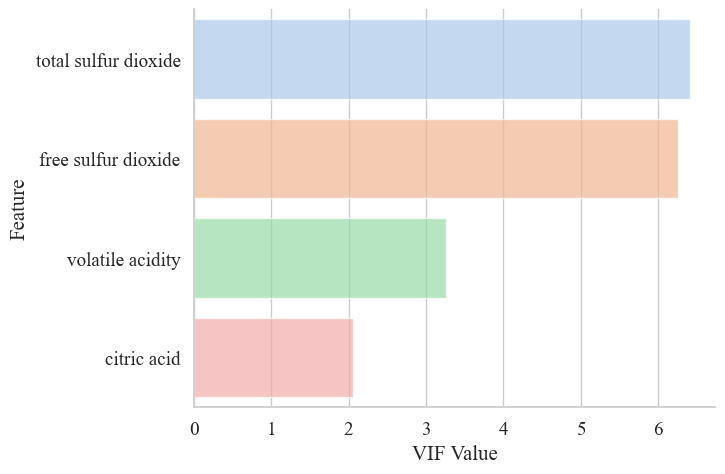

In [41]:
plt.figure(figsize=(20,4))
sb.catplot(data=vif_df, x='VIF Value', y='Feature', kind='bar', aspect=1.5, alpha=0.7)
plt.show()

### 3.6 Scaling (StandardScaler) (to be applied in model pipeline)

In [42]:
ss = StandardScaler()

Xtr_scl_trans = ss.fit_transform(Xtr_pt_yj)   ## np.array as output

print(f'Standard Scaler Mean : {ss.mean_} \n')

print(Xtr_scl_trans.shape)
print(Xtr_scl_trans[0:5])

Standard Scaler Mean : [1.25998466 0.37713643 0.22024438 0.67536505 0.05657658 3.02664496
 4.22974627 0.18565234 1.65894455 0.23938056 0.24444027] 

(1230, 11)
[[-1.2045964  -0.04583663 -0.5803451   1.16623652 -0.97025503 -0.1369541
  -0.47194623 -2.21437997  0.16650717 -0.29562606  1.77327108]
 [ 1.1326323  -1.34283718  0.8972084   0.1536561  -0.00870199  0.81159357
   0.27864968  1.18947002  0.10044869  0.35689354 -0.59502524]
 [ 1.31926319 -0.04583663  1.71433431  0.32440218  1.33733916 -1.10765396
  -1.24990392  0.33002914 -1.45501674  0.28271221  1.30733192]
 [-0.32916903  0.69302267 -1.33550601 -0.64983164  0.31831906  0.09597664
   0.59207721  0.10016367  0.42948393 -1.71964022  0.1373883 ]
 [ 1.40881296  0.8199628  -0.18397911  0.78016802  1.33733916  0.39753873
  -0.15224579  2.10177978 -0.16505845  1.92506124 -0.32789331]]


### 3.7 Feature Selection (to be applied in model pipeline)

In [43]:
skb = SelectKBest(mutual_info_classif, k=8)
Xtr_trans = skb.fit_transform(Xtr_scl_trans, ytr)

print(skb.get_support())
print(skb.scores_)
print(Xtr_trans.shape)
print(Xtr_trans[0:5])

[ True  True  True False False  True  True  True False  True  True]
[0.04382248 0.07646694 0.02761421 0.00594564 0.01345335 0.01923591
 0.06086634 0.02842794 0.01705625 0.08933257 0.14094278]
(1230, 8)
[[-1.2045964  -0.04583663 -0.5803451  -0.1369541  -0.47194623 -2.21437997
  -0.29562606  1.77327108]
 [ 1.1326323  -1.34283718  0.8972084   0.81159357  0.27864968  1.18947002
   0.35689354 -0.59502524]
 [ 1.31926319 -0.04583663  1.71433431 -1.10765396 -1.24990392  0.33002914
   0.28271221  1.30733192]
 [-0.32916903  0.69302267 -1.33550601  0.09597664  0.59207721  0.10016367
  -1.71964022  0.1373883 ]
 [ 1.40881296  0.8199628  -0.18397911  0.39753873 -0.15224579  2.10177978
   1.92506124 -0.32789331]]
